##  Covid19 Data Analysis 
------------------------------------------

### Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Import and clean first dataset on infection 
 


In [2]:
covid = pd.read_csv("covid19_Confirmed_dataset.csv")
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#check shape, return i n tuple format
covid.shape

(266, 104)

In [4]:
#Aggregating the rows by the country
covid = covid.groupby("Country/Region").sum()

In [5]:
covid.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
covid.shape

(187, 102)

###  Visualizing data related to any country.(ex.China)
visualization always helps for better understanding of our data.

<AxesSubplot:>

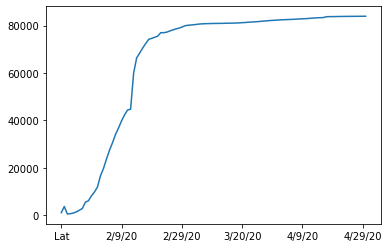

In [7]:
covid.loc["China"].plot()

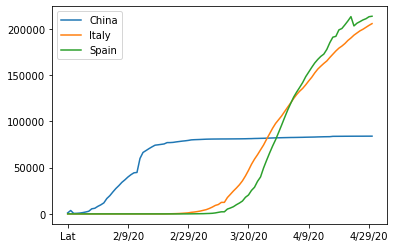

In [8]:
covid.loc["China"].plot()
covid.loc["Italy"].plot()
covid.loc["Spain"].plot()
plt.legend()

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot:>

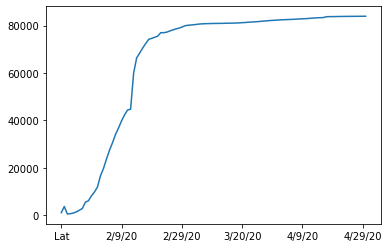

In [9]:
covid.loc["China"].plot()


<AxesSubplot:>

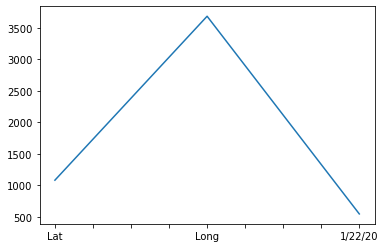

In [10]:
covid.loc['China'][:3].plot()  #first three days infected cases

### caculating the first derivative of the curve

<AxesSubplot:>

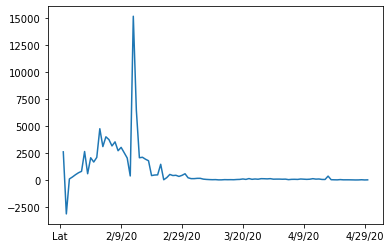

In [11]:
covid.loc["China"].diff().plot()

In [12]:
covid.loc["China"].diff().max()

15136.0

In [13]:
covid.loc["Italy"].diff().max()

6557.0

###  find maximum infection rate for all of the countries. 

In [14]:
countries = list(covid.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid.loc[c].diff().max())
covid["max_infection_rate"] = max_infection_rates

In [15]:
covid.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0000
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0000
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0000
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0000
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,29.0766


### create a new dataframe with only needed column 

In [16]:
covid = pd.DataFrame(covid["max_infection_rate"])

In [17]:
covid.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0000
Albania,34.0000
Algeria,199.0000
Andorra,43.0000
Angola,29.0766


### Import and clean second dataset on happiness report


In [18]:
happiness= pd.read_csv("worldwide_happiness_report.csv")

In [19]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [20]:
# drop the useless columns 
useless_col = ['Overall rank','Score','Generosity','Perceptions of corruption']
happiness.drop(useless_col,axis = 1,inplace = True)
happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [21]:
#set country as index of dataframe

happiness.set_index('Country or region',inplace = True)


In [22]:
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


###  Join covid and happiness dataset 

In [23]:
covid.shape

(187, 1)

In [24]:
happiness.shape

(156, 4)

In [25]:
df = covid.join(happiness,how = "inner")
df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### import and clean  third dataset on covid death

In [26]:
covid_death = pd.read_csv("covid19_deaths_dataset.csv")
covid_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [27]:
covid_death.shape

(266, 104)

In [28]:
#since certain columns are irrelevant we can drop the columns
#axis = 1 because we drop columns not rows
covid_death.drop(["Lat","Long"],axis=1,inplace=True) 

In [29]:
covid_death=covid_death.groupby("Country/Region").sum()

In [30]:
covid_death.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


<AxesSubplot:>

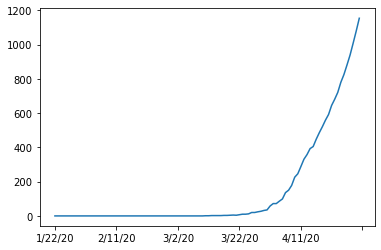

In [31]:
covid_death.loc["India"].plot()

In [32]:
covid_death.loc["United Kingdom"].diff().max()

1172.0

In [33]:
countries = list(covid_death.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(covid_death.loc[c].diff().max())
covid_death["max_death_rate"] = max_death_rates

In [34]:
covid_death.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [35]:
covid_death = pd.DataFrame(covid_death["max_death_rate"])


### Join covid_death data  to df data

In [36]:
covid_death.shape

(187, 1)

In [37]:
df.shape

(143, 5)

In [38]:
df = covid_death.join(df,how = "inner")

In [47]:
df.head()

,max_death_rate,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,232.0,0.350,0.517,0.361,0.000
Albania,4.0,34.0,0.947,0.848,0.874,0.383
Algeria,30.0,199.0,1.002,1.160,0.785,0.086
Argentina,13.0,291.0,1.092,1.432,0.881,0.471
Armenia,3.0,134.0,0.850,1.055,0.815,0.283


In [40]:
df.loc["United Kingdom"]

max_death_rate                  1172.000
max_infection_rate              8733.000
GDP per capita                     1.333
Social support                     1.538
Healthy life expectancy            0.996
Freedom to make life choices       0.450
Name: United Kingdom, dtype: float64

###  Visualize final dataset and analyze correlations

In [41]:
#check correlation between columns
df.corr()

,max_death_rate,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.880071,0.259893,0.204148,0.309666,0.080166
max_infection_rate,0.880071,1.000000,0.251203,0.194233,0.291478,0.080998
GDP per capita,0.259893,0.251203,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.194233,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.291478,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.080998,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

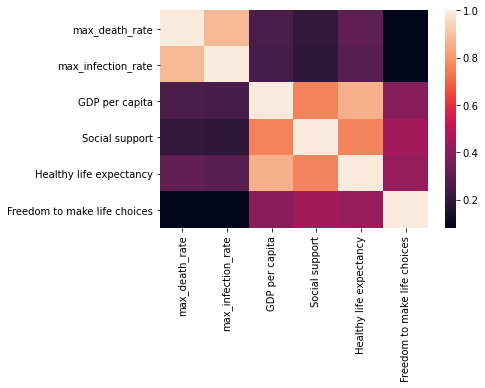

In [42]:
sns.heatmap(df.corr())

/Users/yonga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

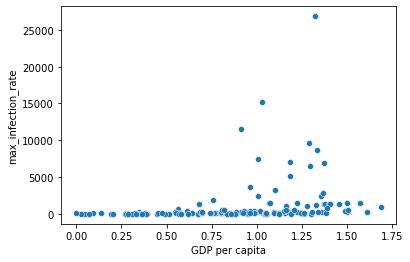

In [43]:
#Plotting GDP vs maximum Infection rate
x = df["GDP per capita"]
y=df["max_infection_rate"]
sns.scatterplot(x,y)

/Users/yonga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

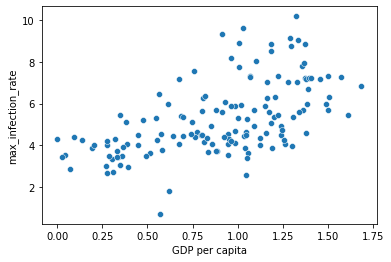

In [44]:
#Plotting GDP vs maximum Infection rate
#correct scaling issue using log scaling
x = df["GDP per capita"]
y=df["max_infection_rate"]
sns.scatterplot(x,np.log(y))

/Users/yonga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

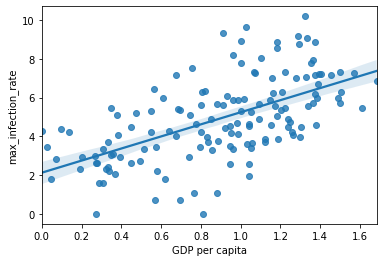

In [98]:
sns.regplot(x,np.log(y))

/Users/yonga/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yonga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rate'>

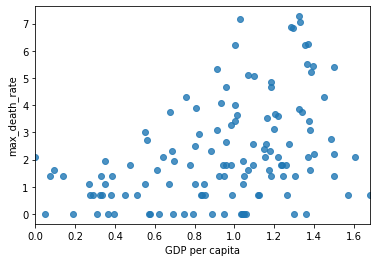

In [108]:
x=df['GDP per capita']
y=df['max_death_rate']
sns.regplot(x,np.log(y))

/Users/yonga/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yonga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_infection_rate', ylabel='max_death_rate'>

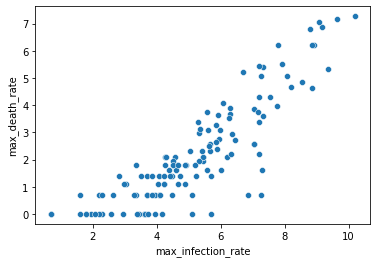

In [113]:
x=df['max_infection_rate']
y=df['max_death_rate']
sns.scatterplot(np.log(x),np.log(y))

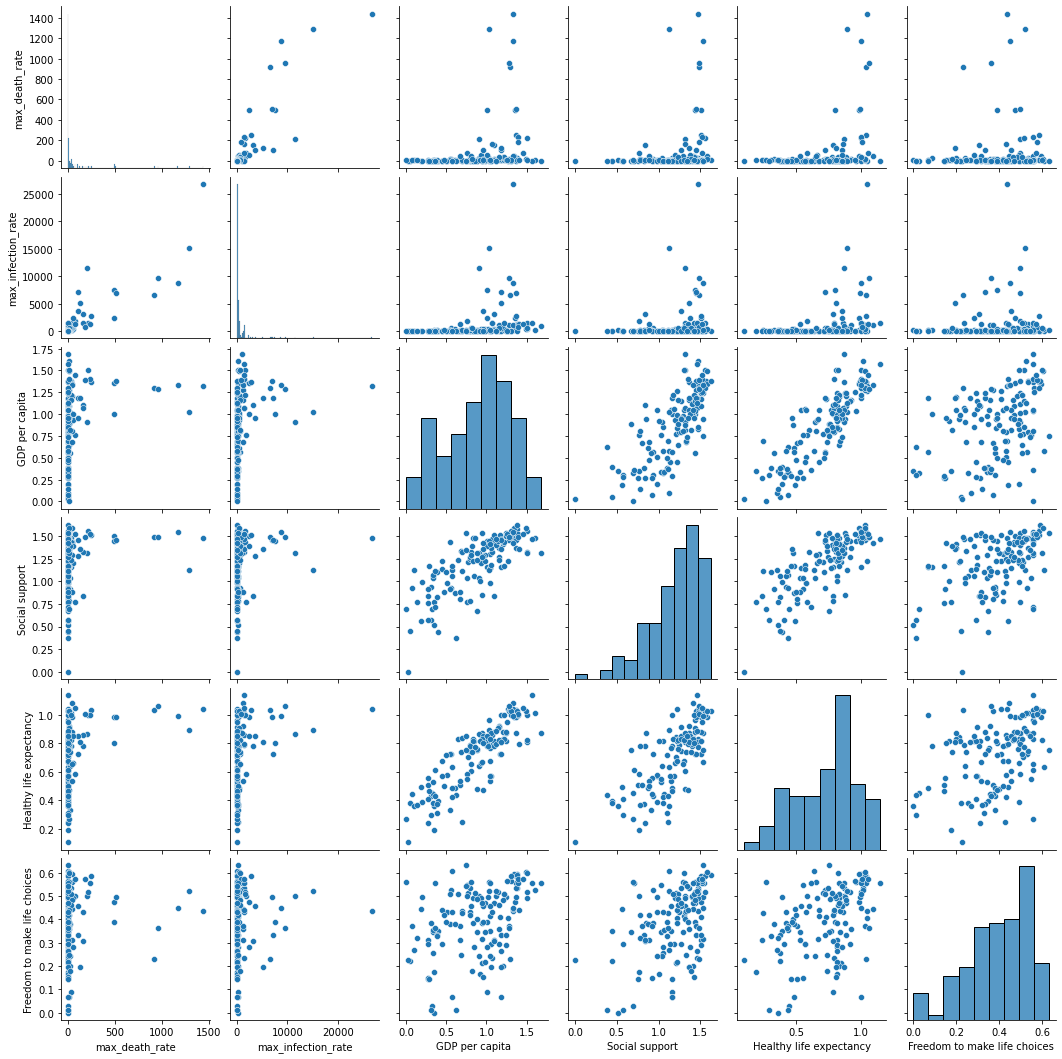

In [103]:
sns.pairplot(df)

In [48]:
df.to_csv("new_covid_data.csv")